In [1]:
%matplotlib inline

import glob
import os
import random
import json
import pickle
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import lsst.sims.maf.db as db
from lsst.sims.maf.utils import m52snr
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.plots as plots

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.utils import equatorialFromGalactic, hpid2RaDec, _healbin, healbin
from lsst.utils import getPackageDir
import healpy as hp


/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName==self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName!=self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  (key is not 'bins') & (key is not 'binCol'):
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did yo

In [2]:
import sys
sys.path.append('/dlusers/ebellm/sims_maf_contrib/mafContrib/')
from TgapsPercentMetric import TgapsPercentMetric

In [3]:
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [51]:
runName = 'baseline_nexp1_v1.7_10yrs'
opsdb = db.OpsimDatabase(f'/sims_maf/fbs_1.7/baseline/{runName}.db')

outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

slicer = slicers.HealpixSlicer(nside=64)

#metric =  metrics.TgapsMetric(bins=np.logspace(-3.46,3.54,99), # https://github.com/RichardsGroup/LSST_OpSim/blob/master/contrib/00_computeLogTgapsMetric.ipynb
#                              allGaps=False)
m1 =  TgapsPercentMetric(allGaps=False)
m2 =  TgapsPercentMetric(allGaps=False,minTime=14./24.,maxTime=(14./24 + 1.))
m2.name += '1day'

sql = ''
# Don't want to try and plot N individual points, 
plotDict = {'reduceFunc': np.sum, 'nside': 64, 'colorMin': 0}
plotFuncs = [plots.HealpixSkyMap(), plots.HealpixHistogram()]
#plotDict = {'bins':np.logspace(-3.46,3.54,99)}
#plotFuncs = [plots.SummaryHistogram()]

summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]

b1 = metricBundles.MetricBundle(m1, slicer, sql, runName=runName,
                                    plotDict=plotDict, plotFuncs=plotFuncs,
                                    summaryMetrics=summaryMetrics)
b1.setRunName(runName)
b2 = metricBundles.MetricBundle(m2, slicer, sql, runName=runName,
                                    plotDict=plotDict, plotFuncs=plotFuncs,
                                    summaryMetrics=summaryMetrics)
b2.setRunName(runName)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [50]:
dir(m2)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'allGaps',
 'badval',
 'colInfo',
 'colNameArr',
 'colRegistry',
 'colname',
 'comment',
 'maps',
 'maxTime',
 'metricDtype',
 'minTime',
 'name',
 'reduceFuncs',
 'reduceOrder',
 'registry',
 'run',
 'shape',
 'timesCol',
 'units']

Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'observationStartMJD', 'fieldRA'].
Found 2208619 visits
Running:  ['baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD_HEAL', 'baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD1day_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


Plotting complete.


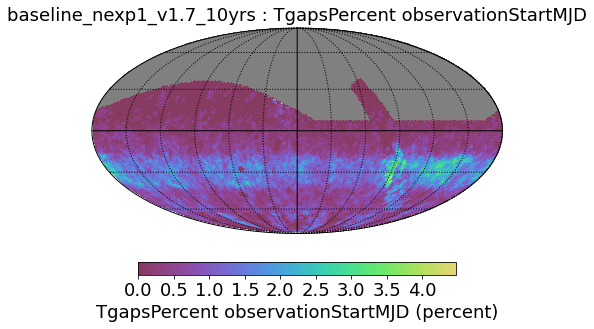

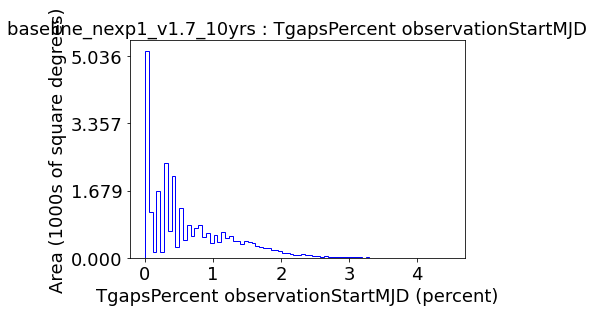

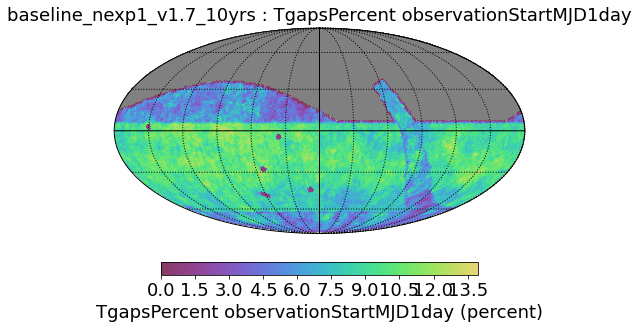

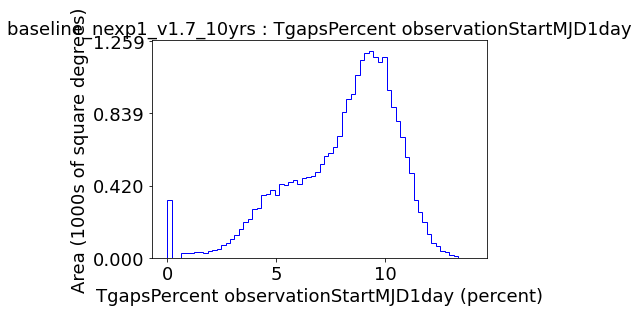

In [52]:
bd = metricBundles.makeBundlesDictFromList([b1,b2])
bgroup = metricBundles.MetricBundleGroup(bd, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [55]:
list(bd.keys())

['baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD_HEAL',
 'baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD1day_HEAL']

In [54]:
bd['baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD_HEAL'].summaryValues

{'Min': 0.0,
 'Mean': 0.6835037019219263,
 'Max': 4.471544715447155,
 'Median': 0.5055611729019212,
 'Rms': 0.637343287837922,
 '25th%ile': 0.20345879959308238,
 '75th%ile': 1.0911796536796536}

In [56]:
bd['baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD1day_HEAL'].summaryValues

{'Min': 0.0,
 'Mean': 8.078253422586437,
 'Max': 13.968253968253968,
 'Median': 8.633093525179856,
 'Rms': 2.439832704590612,
 '25th%ile': 6.57300375960945,
 '75th%ile': 9.851694915254237}

In [23]:
%pdb

Automatic pdb calling has been turned OFF


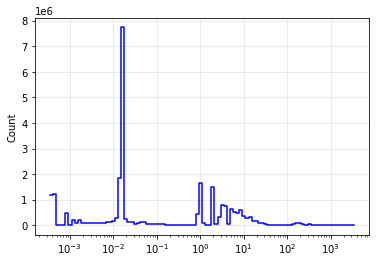

In [27]:
plots.SummaryHistogram().__call__(bd['baseline_nexp1_v1_7_10yrs_Tgaps_observationStartMJD_HEAL'].metricValues, slicer,plotDict)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')

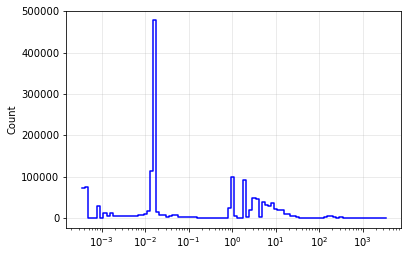

In [21]:
plots.SummaryHistogram().__call__(bd['baseline_nexp1_v1_7_10yrs_Tgaps_observationStartMJD_HEAL'].metricValues, slicer,plotDict)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')

In [4]:
   def make_hist(metricValue, slicer, userPlotDict):
        """
        ripped from https://github.com/lsst/sims_maf/blob/master/python/lsst/sims/maf/plots/specialPlotters.py
        
        Parameters
        ----------
        metricValue : numpy.ma.MaskedArray
            Handles 'object' datatypes for the masked array.
        slicer : lsst.sims.maf.slicers
            Any MAF slicer.
        userPlotDict: dict
            Dictionary of plot parameters set by user (overrides default values).
            'metricReduce' (an lsst.sims.maf.metric) indicates how to marginalize the metric values
            calculated at each point to a single series of values over the sky.
            'histStyle' (True/False) indicates whether to plot the results as a step histogram (True)
            or as a series of values (False)
            'bins' (np.ndarray) sets the x values for the resulting plot and should generally match
            the bins used with the metric.
        fignum : int
            Matplotlib figure number to use (default = None, starts new figure).
        Returns
        -------
        int
           Matplotlib figure number used to create the plot.
        """
        plotDict = {'metricReduce': metrics.SumMetric(), 'histStyle': False}
        plotDict.update(userPlotDict)
        # Combine the metric values across all slicePoints.
        if not isinstance(plotDict['metricReduce'], metrics.BaseMetric):
            raise ValueError('Expected plotDict[metricReduce] to be a MAF metric object.')
        # Get the data type
        dt = metricValue.compressed()[0].dtype
        # Change an array of arrays (dtype=object) to a 2-d array of correct dtype
        mV = np.array(metricValue.compressed().tolist(), dtype=[('metricValue', dt)])
        # Make an array to hold the combined result
        finalHist = np.zeros(mV.shape[1], dtype=float)
        metric = plotDict['metricReduce']
        metric.colname = 'metricValue'
        # Loop over each bin and use the selected metric to combine the results
        for i in np.arange(finalHist.size):
            finalHist[i] = metric.run(mV[:, i])
        bins = plotDict['bins']
        if plotDict['histStyle']:
            leftedge = bins[:-1]
            rightedge = bins[1:]

            x = np.vstack([leftedge, rightedge]).T.flatten()
            y = np.vstack([finalHist, finalHist]).T.flatten()

        else:
            # Could use this to plot things like FFT
            x = bins[:-1]
            y = finalHist
            
        return x, y

In [49]:
x, y = make_hist(bd['baseline_nexp1_v1_7_10yrs_Tgaps_observationStartMJD_HEAL'].metricValues, slicer,plotDict)

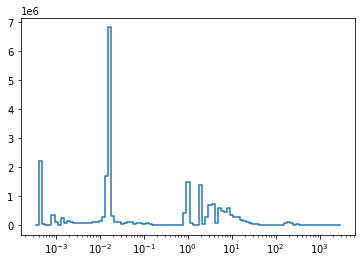

In [95]:
plt.plot(x,y,ds='steps-post')
plt.gca().set_xscale('log')

## Big loop
taken from code by Igor

In [94]:
# Which family of simulations are we interested in?
# * (all)
# List of v1.7 families:
#baseline
#ddf_dither
#euclid_dither
#footprint_tune
#pair_times
#rolling
#rolling_nm
#twi_neo
#twi_pairs
#u_long
#wfd_cadence_drive

# List of names of the families to simulate
families = ["baseline", "ddf_dither", "euclid_dither",
           "footprint_tune", "pair_times", "rolling",
            "rolling_nm", "twi_neo", "twi_pairs",
           "u_long", "wfd_cadence_drive"]


# List of FBS directories for each family
fbss = ["fbs_1.7"] * len(families)

# 1.7.1
families = ["new_rolling"]
fbss = ["fbs_1.7.1"] * len(families)

# examine the triplet obs
#families = ["DDFs", "alt_roll_dust","baseline","beta_radar","bulge","daily_ddf","dcr",
#"filelist","filter_dist","footprints","goodseeing","greedy_footprint","rolling",
#"same_filt","short_exp","slurm","spiders","sync_10yr_ncsa","third_obs",
#"twilight_neo","u60","var_expt","wfd_depth"]
#fbss = ["fbs_1.5"] * len(families)

# Check how many files were found per family
for family, fbs in zip(families, fbss):
    files = glob.glob(f'/sims_maf/{fbs}/{family}/*10yrs.db')
    print(f"Family {family}: {len(files)} files found")

Family new_rolling: 10 files found


In [95]:
families[0] 

'new_rolling'

In [96]:
summary_fam = defaultdict(dict)
#for family, fbs in zip(families[:1], fbss[:1]):
for family, fbs in zip(families, fbss):

    # Let's use glob to make a list of database files. Replace the path with wherever you have your dbs stored
    files = glob.glob(f'/sims_maf/{fbs}/{family}/*10yrs.db')
    files.sort()
    # Name of the runs
    run_names = [filename.split('/')[-1].replace('_v1.710yrs.db', '').replace('_v1.7_10yrs.db', '') for filename in files]
    #run_names = [filename.split('/')[-1].replace('_v1.510yrs.db', '').replace('_v1.5_10yrs.db', '') for filename in files]
    
    # Initialize the list of results
    results = []

    # Loop over each file, save the results in a list
    for filename, run_name in zip(files, run_names):
        opsdb = db.OpsimDatabase(filename)
        # Set each run to save results in a new directory
        outDir = run_name
        resultsDb = db.ResultsDb(outDir=outDir)

        bundleList = []
        sql = ''
        metric =  metrics.TgapsMetric(bins=np.logspace(-3.46,3.54,99), # https://github.com/RichardsGroup/LSST_OpSim/blob/master/contrib/00_computeLogTgapsMetric.ipynb
                              allGaps=False)
        slicer = slicers.HealpixSlicer(nside=64)
        summaryMetrics=[metrics.MedianMetric()]
        #plotDict = {'bins':np.logspace(-3.46,3.54,99)}
        #plotFuncs = [plots.SummaryHistogram()]
        
        # now redo for the non-vector metrics
        m1 =  TgapsPercentMetric(allGaps=False)
        m2 =  TgapsPercentMetric(allGaps=False,minTime=14./24.,maxTime=(14./24 + 1.))
        m2.name += '1day'

        summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]


        
        bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=run_name,
                                    plotDict=plotDict, plotFuncs=plotFuncs)
        
        b1 = metricBundles.MetricBundle(m1, slicer, sql, runName=runName,
                                    plotDict=plotDict, plotFuncs=plotFuncs,
                                    summaryMetrics=summaryMetrics)
        b1.setRunName(runName)
        b2 = metricBundles.MetricBundle(m2, slicer, sql, runName=runName,
                                    plotDict=plotDict, plotFuncs=plotFuncs,
                                    summaryMetrics=summaryMetrics)
        b2.setRunName(runName) 
        
        bd = metricBundles.makeBundlesDictFromList([bundle, b1, b2])
        bg = metricBundles.MetricBundleGroup(bd, opsdb, outDir=outDir, resultsDb=resultsDb)
        bg.runAll()
        # Plotting
        #bg.plotAll(closefigs=False)

        # NOTE: this was changed from Peter's tutorial, because results.append(bundleList) returned empty summaries
        #results.append(bundleList)
        
        # Dictionary of metric results
        metric_names = bd.keys()
        summary_fam[family][run_name] = defaultdict(dict)
        
        print(metric_names)
        for metric_name in metric_names:
            if 'Tgaps_' in metric_name:
                try:
                    x, y = make_hist(bd[metric_name].metricValues, slicer,{'bins':np.logspace(-3.46,3.54,99)})
                except KeyError:
                    continue
                # Update the summary_fam dictionary
                summary_fam[family][run_name][metric_name] = {}
                summary_fam[family][run_name][metric_name]["dt_hist_x"] = x
                summary_fam[family][run_name][metric_name]["dt_hist_y"] = y
            else:
                summary_fam[family][run_name][metric_name] = bd[metric_name].summaryValues
        

        

        
# Save the results in a pkl file
#with open('histograms_1.7.pickle', 'wb') as handle:
with open('histograms_1.7.1.pickle', 'wb') as handle:
#with open('histograms_1.5.pickle', 'wb') as handle:
    pickle.dump(summary_fam, handle, protocol=pickle.HIGHEST_PROTOCOL)



Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'observationStartMJD', 'fieldRA'].
Found 2044984 visits
Running:  ['baseline_nexp2_v1_7_1_10yrs_db_Tgaps_observationStartMJD_HEAL', 'baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD_HEAL', 'baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD1day_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
dict_keys(['baseline_nexp2_v1_7_1_10yrs_db_Tgaps_observationStartMJD_HEAL', 'baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD_HEAL', 'baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD1day_HEAL'])
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fieldDec', 'observationStartMJD', 'fieldRA'].
Found 2034648 visits
Running:  ['bulge_roll_scale0_90_nslice2_fpw0_9_nrw1_0v1_7_10

In [5]:
b = {}
for fname in ['histograms_1.5.pickle',  'histograms_1.7.1.pickle',  'histograms_1.7.pickle']:
    with open(fname, 'rb') as handle:
        d = pickle.load(handle)
        for key in d.keys():
            b[key] = d[key]


In [6]:
b.keys()

dict_keys(['DDFs', 'alt_roll_dust', 'baseline', 'bulge', 'daily_ddf', 'dcr', 'filter_dist', 'footprints', 'goodseeing', 'greedy_footprint', 'rolling', 'same_filt', 'short_exp', 'spiders', 'third_obs', 'twilight_neo', 'u60', 'var_expt', 'wfd_depth', 'new_rolling', 'ddf_dither', 'euclid_dither', 'footprint_tune', 'pair_times', 'rolling_nm', 'twi_neo', 'twi_pairs', 'u_long', 'wfd_cadence_drive'])

In [99]:
len(b.keys())

29

In [100]:
b['baseline']['baseline_nexp1'].keys()

dict_keys(['baseline_nexp1_Tgaps_observationStartMJD_HEAL', 'baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD_HEAL', 'baseline_nexp1_v1_7_10yrs_TgapsPercent_observationStartMJD1day_HEAL'])

Text(0, 0.5, 'Number of observation pairs')

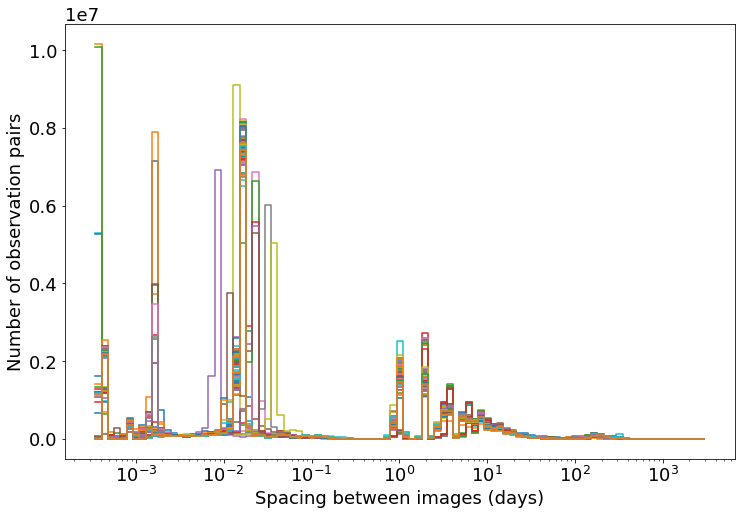

In [7]:
fig = plt.figure(figsize=(12,8))
for family in b.keys():
    for run in b[family].keys():
        #metric = 'baseline_nexp1_v1_7_10yrs_Tgaps_observationStartMJD_HEAL'
        metric = list(b[family][run].keys())[0]

        x = b[family][run][metric]['dt_hist_x']
        y = b[family][run][metric]['dt_hist_y']
        plt.plot(x,y,ds='steps-post', label=run)
plt.gca().set_xscale('log')
plt.xlabel('Spacing between images (days)')
plt.ylabel('Number of observation pairs')
#plt.legend()
#plt.gca().set_yscale('log')


In [121]:
families = ['DDFs', 'alt_roll_dust', 'baseline', 'bulge', 'daily_ddf', 'dcr', 'filter_dist', 'footprints', 'goodseeing', 'greedy_footprint', 
            'rolling', 'same_filt', 'short_exp', 'spiders', 'third_obs', 'twilight_neo', 'u60', 'var_expt', 'wfd_depth', 'new_rolling',
            'ddf_dither', 'euclid_dither', 'footprint_tune', 'pair_times', 'rolling_nm', 'twi_neo', 'twi_pairs', 'u_long', 'wfd_cadence_drive']

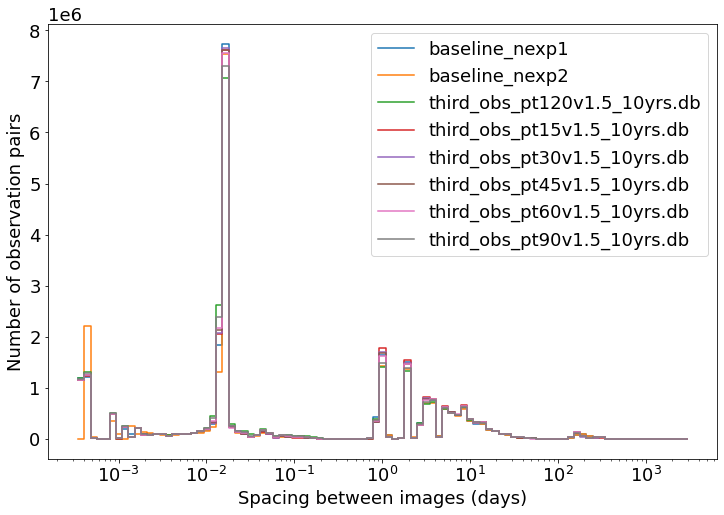

In [7]:
fig = plt.figure(figsize=(12,8))
for family in ['baseline', "third_obs"]:
    for run in b[family].keys():
        metric = list(b[family][run].keys())[0]
        x = b[family][run][metric]['dt_hist_x']
        y = b[family][run][metric]['dt_hist_y']
        plt.plot(x,y,ds='steps-post', label=run)
plt.gca().set_xscale('log')
plt.xlabel('Spacing between images (days)')
plt.ylabel('Number of observation pairs')
plt.legend()
#plt.gca().set_yscale('log')

### white paper figures

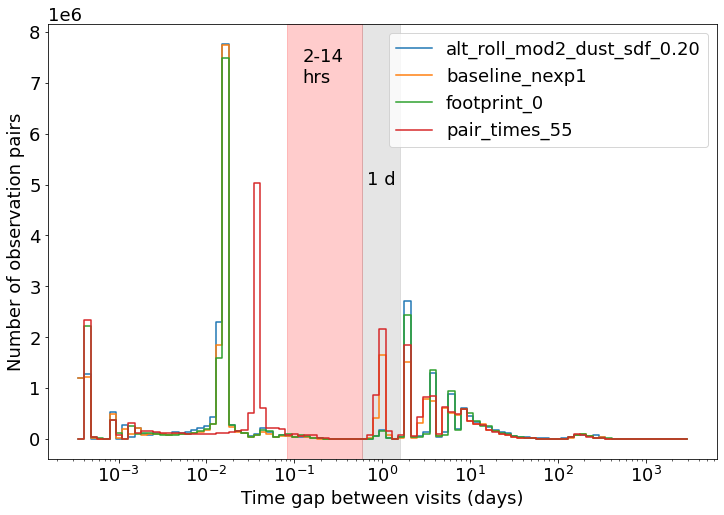

In [51]:
runs_to_plot = ['baseline_nexp1',
'third_obs_pt4',
'pair_times_55',
'footprint_0',
'alt_roll_mod2_dust_sdf_0.20']
#'rolling_nm_scale0.90_nslice3_fpw0.9_nrw1.0'] # this one didn't show up for some reason

fig = plt.figure(figsize=(12,8))
for family in b.keys():
    for run in b[family].keys():
        #metric = 'baseline_nexp1_v1_7_10yrs_Tgaps_observationStartMJD_HEAL'
        latexrun = run.replace('_v1.5_10yrs.db','').replace('v1.5_10yrs.db','').replace('v1.7_10yrs.db','').replace('_v1.7_10yrs.db','')
        if latexrun not in runs_to_plot:
            continue
        metric = list(b[family][run].keys())[0]

        x = b[family][run][metric]['dt_hist_x']
        y = b[family][run][metric]['dt_hist_y']
        plt.plot(x,y,ds='steps-post', label=latexrun)

plt.gca().axvspan(2./24, 14/24., alpha=0.2, color='red')
plt.gca().axvspan(14/24., 38/24., alpha=0.2, color='grey')

plt.text(3/24.,7e6,'2-14\nhrs')
plt.text(16/24.,5e6,'1 d')


plt.gca().set_xscale('log')
plt.xlabel('Time gap between visits (days)')
plt.ylabel('Number of observation pairs')
plt.legend()
plt.savefig('dt_hist.png',bbox_inches='tight',facecolor='white')

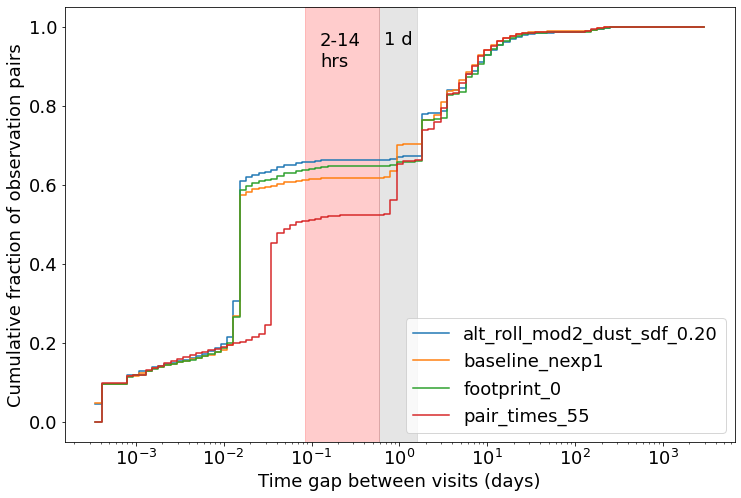

In [52]:
runs_to_plot = ['baseline_nexp1',
'third_obs_pt4',
'pair_times_55',
'footprint_0',
'alt_roll_mod2_dust_sdf_0.20']
#'rolling_nm_scale0.90_nslice3_fpw0.9_nrw1.0'] # this one didn't show up for some reason

fig = plt.figure(figsize=(12,8))
for family in b.keys():
    for run in b[family].keys():
        #metric = 'baseline_nexp1_v1_7_10yrs_Tgaps_observationStartMJD_HEAL'
        latexrun = run.replace('_v1.5_10yrs.db','').replace('v1.5_10yrs.db','').replace('v1.7_10yrs.db','').replace('_v1.7_10yrs.db','')
        if latexrun not in runs_to_plot:
            continue
        metric = list(b[family][run].keys())[0]

        x = b[family][run][metric]['dt_hist_x']
        y = b[family][run][metric]['dt_hist_y']
        plt.plot(x,np.cumsum(y)/np.sum(y),ds='steps-post', label=latexrun)

plt.gca().axvspan(2./24, 14/24., alpha=0.2, color='red')
plt.gca().axvspan(14/24., 38/24., alpha=0.2, color='grey')

plt.text(3/24.,.9,'2-14\nhrs')
plt.text(16/24.,.955,'1 d')


plt.gca().set_xscale('log')
plt.xlabel('Time gap between visits (days)')
plt.ylabel('Cumulative fraction of observation pairs')
plt.legend()
plt.savefig('dt_hist_cdf.png',bbox_inches='tight',facecolor='white')

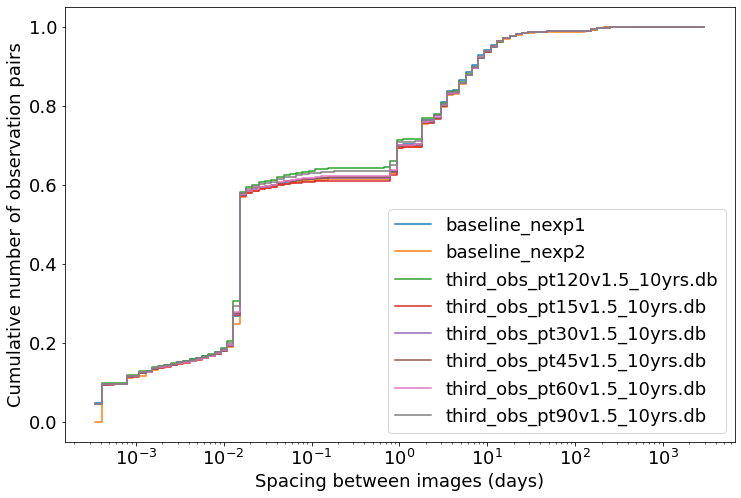

In [9]:
fig = plt.figure(figsize=(12,8))
for family in ['baseline', "third_obs"]:
    for run in b[family].keys():
        metric = list(b[family][run].keys())[0]
        x = b[family][run][metric]['dt_hist_x']
        y = b[family][run][metric]['dt_hist_y']
        plt.plot(x,np.cumsum(y)/np.sum(y),ds='steps-post', label=run)
plt.gca().set_xscale('log')
plt.xlabel('Spacing between images (days)')
plt.ylabel('Cumulative number of observation pairs')
plt.legend()
#plt.gca().set_yscale('log')

In [119]:
for family in b.keys():
    for run in b[family].keys():
        metric = list(b[family][run].keys())[1]
        m1 = b[family][run][metric]['Median']
        metric = list(b[family][run].keys())[2]
        m2 = b[family][run][metric]['Median']
        latexrun = run.replace('_v1.5_10yrs.db','').replace('v1.5_10yrs.db','').replace('_','\_')
        print(f"{latexrun} & {m1:.2f}\% & {m2:.2f}\% \\\\")


agnddf & 0.32\% & 8.52\% \\
descddf & 0.33\% & 8.54\% \\
alt\_dust & 0.43\% & 0.55\% \\
alt\_roll\_mod2\_dust\_sdf\_0.20 & 0.46\% & 0.58\% \\
roll\_mod2\_dust\_sdf\_0.20 & 0.33\% & 8.37\% \\
baseline\_nexp1 & 0.51\% & 8.63\% \\
baseline\_nexp2 & 0.46\% & 8.22\% \\
bulges\_bs & 0.23\% & 7.83\% \\
bulges\_bulge\_wfd & 0.23\% & 7.82\% \\
bulges\_cadence\_bs & 0.23\% & 7.79\% \\
bulges\_cadence\_bulge\_wfd & 0.24\% & 7.80\% \\
bulges\_cadence\_i\_heavy & 0.24\% & 7.78\% \\
bulges\_i\_heavy & 0.24\% & 7.74\% \\
daily\_ddf & 0.33\% & 8.61\% \\
dcr\_nham1\_ug & 0.72\% & 8.55\% \\
dcr\_nham1\_ugr & 0.90\% & 9.01\% \\
dcr\_nham1\_ugri & 1.05\% & 9.27\% \\
dcr\_nham2\_ug & 0.85\% & 8.97\% \\
dcr\_nham2\_ugr & 1.13\% & 9.63\% \\
dcr\_nham2\_ugri & 1.37\% & 9.93\% \\
filterdist\_indx1 & 0.29\% & 9.17\% \\
filterdist\_indx2 & 0.28\% & 9.19\% \\
filterdist\_indx3 & 0.29\% & 8.94\% \\
filterdist\_indx4 & 0.28\% & 9.15\% \\
filterdist\_indx5 & 0.28\% & 9.18\% \\
filterdist\_indx6 & 0.28\% & 8.76\% \\


In [ ]:
'xyx'.replace('')

In [1]:
20/60/24

0.013888888888888888

In [98]:
1e-3 * 24 *3600

86.4

In [105]:
.1*24

2.4000000000000004

In [106]:
.05*24

1.2000000000000002

In [17]:
x = b['baseline']['baseline_nexp1']['baseline_nexp1_v1_7_10yrs_Tgaps_observationStartMJD_HEAL']['dt_hist_x']
y = b['baseline']['baseline_nexp1']['baseline_nexp1_v1_7_10yrs_Tgaps_observationStartMJD_HEAL']['dt_hist_x']
cdf = np.cumsum(y)/np.sum(y)

In [39]:
from scipy.interpolate import interp1d
interp_cdf= interp1d(x,y)

In [42]:
(interp_cdf(14./24) - interp_cdf(2./24))*100

50.0

In [45]:
x

array([3.46736850e-04, 4.08722524e-04, 4.81789291e-04, 5.67918105e-04,
       6.69444050e-04, 7.89119649e-04, 9.30189491e-04, 1.09647820e-03,
       1.29249411e-03, 1.52355151e-03, 1.79591474e-03, 2.11696796e-03,
       2.49541544e-03, 2.94151745e-03, 3.46736850e-03, 4.08722524e-03,
       4.81789291e-03, 5.67918105e-03, 6.69444050e-03, 7.89119649e-03,
       9.30189491e-03, 1.09647820e-02, 1.29249411e-02, 1.52355151e-02,
       1.79591474e-02, 2.11696796e-02, 2.49541544e-02, 2.94151745e-02,
       3.46736850e-02, 4.08722524e-02, 4.81789291e-02, 5.67918105e-02,
       6.69444050e-02, 7.89119649e-02, 9.30189491e-02, 1.09647820e-01,
       1.29249411e-01, 1.52355151e-01, 1.79591474e-01, 2.11696796e-01,
       2.49541544e-01, 2.94151745e-01, 3.46736850e-01, 4.08722524e-01,
       4.81789291e-01, 5.67918105e-01, 6.69444050e-01, 7.89119649e-01,
       9.30189491e-01, 1.09647820e+00, 1.29249411e+00, 1.52355151e+00,
       1.79591474e+00, 2.11696796e+00, 2.49541544e+00, 2.94151745e+00,
      

In [37]:
w = (x <= 2./24) | (x >= 14./24)

In [38]:
np.sum(w)

86

In [23]:
(cdf[w].max()-cdf[w].min())*100

0.016144701243134257

In [36]:
cdf

array([1.78768653e-08, 3.89495533e-08, 6.37893771e-08, 9.30697822e-08,
       1.27584605e-07, 1.68269596e-07, 2.16227788e-07, 2.72759399e-07,
       3.39397090e-07, 4.17947510e-07, 5.10540281e-07, 6.19685735e-07,
       7.48342973e-07, 9.00000090e-07, 1.07876874e-06, 1.28949562e-06,
       1.53789386e-06, 1.83069791e-06, 2.17584614e-06, 2.58269605e-06,
       3.06227797e-06, 3.62759408e-06, 4.29397099e-06, 5.07947519e-06,
       6.00540290e-06, 7.09685744e-06, 8.38342982e-06, 9.90000099e-06,
       1.16876875e-05, 1.37949563e-05, 1.62789387e-05, 1.92069792e-05,
       2.26584615e-05, 2.67269606e-05, 3.15227798e-05, 3.71759409e-05,
       4.38397100e-05, 5.16947520e-05, 6.09540291e-05, 7.18685745e-05,
       8.47342983e-05, 9.99000100e-05, 1.17776875e-04, 1.38849563e-04,
       1.63689387e-04, 1.92969792e-04, 2.27484615e-04, 2.68169606e-04,
       3.16127798e-04, 3.72659409e-04, 4.39297100e-04, 5.17847520e-04,
       6.10440291e-04, 7.19585745e-04, 8.48242983e-04, 9.99900100e-04,
      